In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Import data


df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [49]:
# Add 'overweight' column
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [50]:
### Normalize data by making 0 always good and 1 always bad. 

# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['gluc'] == 1, 'gluc'] = 0

# If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [51]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [52]:
# Draw Categorical Plot
# def draw_cat_plot():

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(cp, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [74]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature
# You will have to rename one of the columns for the catplot to work correctly
to_plot = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).value_counts()
to_plot = to_plot.rename(columns={'count': 'total'})
to_plot.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


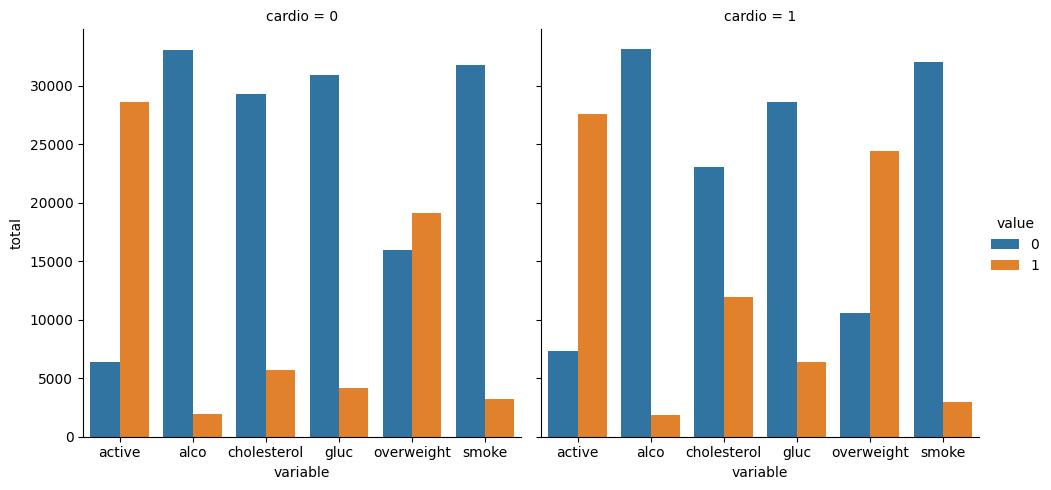

In [77]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=to_plot, x='variable', y='total', kind='bar', col='cardio', hue='value')

In [78]:
# Do not modify the next two lines
fig.savefig('catplot.png')
# return fig

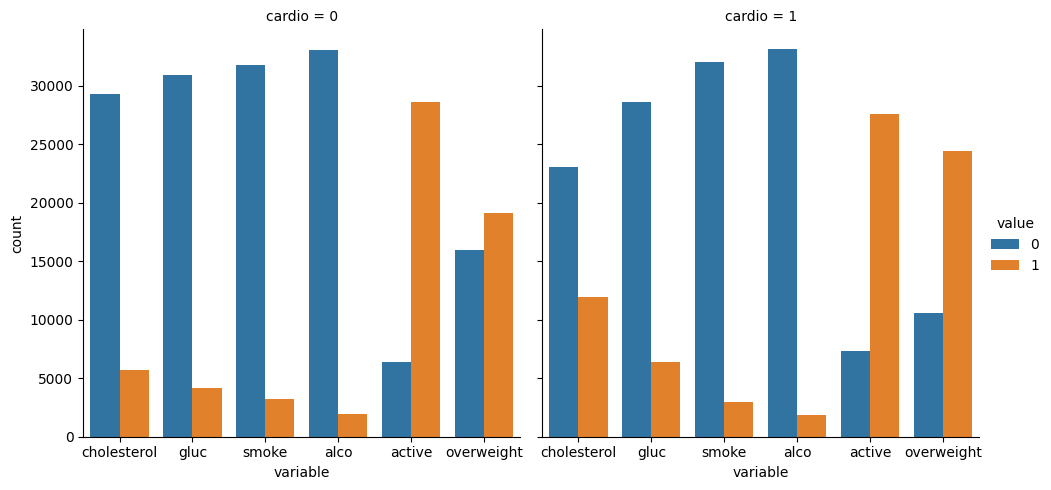

In [45]:
sb.catplot(data=cp2, x='variable', kind='count', col='cardio', hue='value')

In [ ]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'



    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig